# Microdados de Vacinação - OpenDataSUS

Este documento possui o código que utilizo para processar o arquivo de microdados da vacinação disponibilizado pelo SUS. As informações sobre a base pode ser encontrada [neste link](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao). Existem duas formas de acessar os dados: (1) a partir do arquivo CSV, que atualmente possui mais de 1GB de dados ou (2) através de uma API Elasticsearch. Como não tenho experiência com essa segunda forma, o processamento a seguir é feito diretamente do arquivo de vacinação. Para baixar, entre no link indicado anteriormente. O arquivo não está disponível no repositório. 

Para o processamento estou usando o [pandas](https://pandas.pydata.org/). A proposta é criar um arquivo CSV com as informações para posterior visualização dos dados. 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data_microdados = pd.read_csv("Microdados_20210212.csv")

In [63]:
data_microdados['dose'] = data_microdados['vacina_descricao_dose'].str.strip().str[0].astype(int)

In [64]:
data_microdados['paciente_idade_grupo'] = pd.cut(data_microdados['paciente_idade'],bins=[0,13,19,60,float("inf")],right=False,labels=['criança','adolescente','adulto','idoso'])

In [65]:
data_microdados.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,dose,paciente_idade_grupo
0,d5e95060-b860-4616-823f-bab64c08fe17-i0b0,bbac0fe7260167e24ffb1267ea23e194a5918c9eb3670b...,82.0,1938-02-19,F,5.0,INDIGENA,291140,10,GLORIA,...,202010027,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-20T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,idoso
1,acf53ddf-3845-4b09-9405-88937dc74c30-i0b0,e2879d630364cfaa7caba0b0cf00f05ed94f03ae9b64ee...,35.0,1985-11-22,F,3.0,PARDA,280440,10,NEOPOLIS,...,200280,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-09T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
2,f24ee42d-99ae-4057-9513-158dab8935de-i0b0,34ce8ee4c6f5ec52f164b0f3c248bca39364dfad5a3f95...,78.0,1942-03-05,F,4.0,AMARELA,230730,10,JUAZEIRO DO NORTE,...,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-04T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,idoso
3,aa45491d-af26-475b-a843-150269052658-i0b0,24c16c887cc6e7f1dd5fceb9dddb625260165d43f2284f...,87.0,1933-07-01,M,1.0,BRANCA,330455,10,RIO DE JANEIRO,...,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-10T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,idoso
4,a6734a0e-9657-4180-81a1-3d2cad30caa0-i0b0,d0380a6cbe5a1419a679952a1fa3224c57dde2bb3ba6dc...,30.0,1990-03-27,F,4.0,AMARELA,316250,10,SAO JOAO DEL REI,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-22T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto


In [66]:
data_microdados.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem', 'dose', 'paciente_idade_grupo'],
      dtype='object

In [67]:
data_microdados.dtypes

document_id                                   object
paciente_id                                   object
paciente_idade                               float64
paciente_dataNascimento                       object
paciente_enumSexoBiologico                    object
paciente_racaCor_codigo                      float64
paciente_racaCor_valor                        object
paciente_endereco_coIbgeMunicipio             object
paciente_endereco_coPais                      object
paciente_endereco_nmMunicipio                 object
paciente_endereco_nmPais                      object
paciente_endereco_uf                          object
paciente_endereco_cep                         object
paciente_nacionalidade_enumNacionalidade      object
estabelecimento_valor                          int64
estabelecimento_razaoSocial                   object
estalecimento_noFantasia                      object
estabelecimento_municipio_codigo             float64
estabelecimento_municipio_nome                

In [372]:
data_microdados.shape

(2188463, 34)

## Verificando incosistências

Nesse tipo de dado, coletados do Brasil inteiro, pode acontecer de ter alguma inconsistência. Muitas das vezes se dar por conta de erro no processo de digitação e coleta destas informações. Mesmo sem ter como saber a origem do problema, vale a pena verificar algumas possíveis inconsistência para um eventual pré-processamento  da base. 

### Datas 

Vamos dar uma olhada na quantidade de registros de vacinação por dia. 

In [219]:
data_microdados.groupby(by=['vacina_dataAplicacao','dose']).count()[['paciente_id']]

paciente_id
vacina_dataAplicacao     dose             
1971-01-29T00:00:00.000Z 1               1
1979-01-22T00:00:00.000Z 1               1
1980-03-04T00:00:00.000Z 1               1
1988-03-26T00:00:00.000Z 1               1
2018-01-28T00:00:00.000Z 1               1
...                                    ...
2021-02-12T00:00:00.000Z 2               8
2021-02-12T03:00:00.000Z 1            7312
                         2            3814
2021-02-20T00:00:00.000Z 1               1
2021-10-20T00:00:00.000Z 1               1

[117 rows x 1 columns]

É fácil perceber que existe inconsistência. Existem registros de vacinação de 1971, 1979, 1980, 1988. Vamos ver quantos registros de vacinação antes do dia 17/01 quando a primeira dose da vacina foi aplicada: https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2021/01/17/enfermeira-de-sp-negra-moradora-de-itaquera-e-1-vacinada-no-brasil.htm.

In [223]:
data_microdados[data_microdados['vacina_dataAplicacao'] < '2021-01-17'].groupby(by=['vacina_dataAplicacao','dose']).count()[['paciente_id']]

,,paciente_id
vacina_dataAplicacao,dose,
1971-01-29T00:00:00.000Z,1,1
1979-01-22T00:00:00.000Z,1,1
1980-03-04T00:00:00.000Z,1,1
1988-03-26T00:00:00.000Z,1,1
2018-01-28T00:00:00.000Z,1,1
2020-12-20T00:00:00.000Z,1,1
2020-12-28T00:00:00.000Z,1,2
2020-12-29T00:00:00.000Z,1,1
2021-01-01T00:00:00.000Z,1,2


Observe que no total são apenas 15 registros com datas de vacinação inconsistente.

### Idade

Uma outra verificação é em relação a idade de quem recebeu as doses. Para isso vamos olhar o quantitativo no campo `paciente_idade_grupo` que foi criado a partir do campo original `paciente_idade`. 

In [250]:
data_microdados[['paciente_idade_grupo']].value_counts()

paciente_idade_grupo
adulto                  1648916
idoso                    530916
adolescente                8494
criança                     136
dtype: int64

Somando o quantitativo de **crianças** e **adolescentes** tempos no total 8630 registros de pessoas menores que 17 anos que receberam a vacina. Sabendo que a aplicação da vacina está sendo em grupos prioritários que não incluem crianças e adolescentes, esses dados mostram mais uma inconsistência. Vamos ver esse quantitativo por idade. 

In [253]:
data_microdados[data_microdados['paciente_idade'] < 18].groupby(by='paciente_idade').count()[['paciente_id']]

,paciente_id
paciente_idade,
0.0,16
1.0,9
2.0,7
3.0,8
4.0,12
5.0,6
6.0,8
7.0,11
8.0,9


Vamos relacionar esses dados com o campo `vacina_grupoAtendimento_nome`:

In [264]:
temp_data = data_microdados[data_microdados['paciente_idade'] < 18].groupby(by=['paciente_idade','vacina_grupoAtendimento_nome']).count()[['paciente_id']]
initial_age = 0
print('Idade 0')
for index, row in temp_data.iterrows():
        if index[0] != initial_age:
            print()
            print('Idade %i' % index[0])
            initial_age = index[0]
        print(' %i %s' % (row['paciente_id'], index[1]))

Idade 0
 2 Assistente Social
 5 Outros
 1 Pessoal da Limpeza
 1 Pessoas de 80 anos ou mais
 6 Povos indígenas em terras indígenas
 1 Técnico de Enfermagem

Idade 1
 2 Enfermeiro(a)
 1 Outros
 1 Pessoas de 60 nos ou mais Institucionalizadas
 1 Pessoas de 80 anos ou mais
 3 Povos indígenas em terras indígenas
 1 Técnico de Enfermagem

Idade 2
 1 Cuidador de Idosos
 2 Enfermeiro(a)
 1 Outros
 1 Pessoas de 80 anos ou mais
 1 Povos indígenas em terras indígenas
 1 Recepcionista

Idade 3
 1 Médico
 2 Outros
 1 Pessoas de 75 a 79 anos
 3 Povos indígenas em terras indígenas
 1 Segurança

Idade 4
 1 Enfermeiro(a)
 1 Fisioterapeutas
 1 Fonoaudiólogo
 2 Médico
 2 Outros
 1 Pessoas de 80 anos ou mais
 1 Povos indígenas em terras indígenas
 1 Profissionais de Educação Física
 1 Recepcionista
 1 Técnico de Enfermagem

Idade 5
 1 Motorista de Ambulância
 1 Pessoal da Limpeza
 3 Povos indígenas em terras indígenas
 1 Técnico de Enfermagem

Idade 6
 1 Enfermeiro(a)
 3 Outros
 3 Povos indígenas em terra

É fácil perceber a inconsitência quando você ver médicos, enfermeiros, motoristas com idades inferiores à 18 anos. 

### Recebimento das doses

O campo `paciente_id` identifica unicamente cada uma das pessoas que receberam a vacina. Com essa informação é possível fazer algumas verificações a respeito da duplicidade de informação. Vamos dar uma olhada nisso em vários aspectos. 

Primeiro vamos ver se existe dados duplicados entre os pacientes que receberam a primeira dose. 

In [331]:
data_microdados.shape

(2188463, 34)

In [294]:
all_dose1 = data_microdados[data_microdados['dose'] == 1]

Rodando o código a seguir, é possível ver que existem pouco mais de 21000 registros duplicados.

In [296]:
all_dose1[all_dose1[['paciente_id']].duplicated()]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,dose,paciente_idade_grupo
5664,1ddbfdac-1651-45be-aa65-64b96cc89917-i0b0,da72b5883d98f5413e002395ef043355660dfed9baa626...,37.0,1983-11-19,F,1.0,BRANCA,130010,10,ANORI,...,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-01T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,adulto
10900,c3868177-5255-4121-9ed6-1bf84eefbcff-i0b0,2e40bb9997ddd9c0688a65f36ea0339d7c18b83f895ead...,34.0,1986-04-28,F,3.0,PARDA,150230,10,CAPITAO POCO,...,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-29T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,adulto
20824,46b395b5-3369-4f7e-b427-2b25a78cd22d-i0b0,419bf25e0aeaa6c0c997a091fb9310cae0a49316561113...,39.0,1982-01-02,M,99.0,SEM INFORMACAO,211003,10,SANTA LUZIA DO PARUA,...,202010028,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-22T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
21360,d7a403bb-69d1-4a6a-b4ee-bc267663b66a-i0b0,951d6690eabcb503ff2b1869a04310c5d83359b4a55f9c...,24.0,1997-01-03,F,1.0,BRANCA,314800,10,PATOS DE MINAS,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
22086,0628e010-e860-4d00-a216-03b5d5bb4d4c-i0b0,05484559dfed05c57e58f2c9962e11cf9bee3285ceee84...,55.0,1965-08-12,F,1.0,BRANCA,430750,10,ESPUMOSO,...,210010,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-10T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188117,5f847264-38fd-4677-b736-b2bda81d4618-i0b0,b3bada52eddd793fc6f479c5027a017d0917c57d9ed3fe...,50.0,1970-06-14,F,3.0,PARDA,316920,10,TOMBOS,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-19T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
2188147,cd03822a-1b95-4060-a9e1-f1010a277b12-i0b0,db8ddc600161a0b90a9f6a712014cc752923cbeda8e872...,88.0,1932-07-10,M,4.0,AMARELA,290990,10,CURACA,...,202010041,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-20T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,idoso
2188217,a7ce7560-eb1c-468a-a324-1be61a3707bc-i0b0,0225e652de72e497975450fcc62785449ce1f77bcc3cdd...,25.0,1995-04-29,M,3.0,PARDA,231090,10,PIQUET CARNEIRO,...,202010034,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-19T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
2188365,2df0c5e2-97f1-4004-89b4-0a0d8604c322-i0b0,018f24583d5207605abf8429075c378d5b218bb1b58916...,22.0,1998-07-13,M,4.0,AMARELA,291320,10,IBOTIRAMA,...,202010027,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-28T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto


O código acima exibe somente as linhas duplicadas. Podemos ver os registros duplicados um seguido do outro com o código a seguir. 

In [299]:
all_dose1[all_dose1[['paciente_id']].duplicated(keep=False)].sort_values(by='paciente_id')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,dose,paciente_idade_grupo
203053,b5532f04-67c4-43f1-9727-5ca705058df6-i0b0,0000512507433b89d262cfab7a959fc7ef4a541599394c...,40.0,1980-10-18,F,5.0,INDIGENA,210480,10,GRAJAU,...,202010028,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-29T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
739229,31510ee2-7abf-4b8e-9164-e5b032a5a03f-i0b0,0000512507433b89d262cfab7a959fc7ef4a541599394c...,40.0,1980-10-18,F,5.0,INDIGENA,210480,10,GRAJAU,...,202010028,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-29T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
1459697,d6977ae6-d367-4f7a-abb0-7c4dd44a425a-i0b0,0002e29664ab71ca5224c81b76ea6cc5a3f803f7d50968...,22.0,1998-07-14,F,5.0,INDIGENA,310050,10,ACUCENA,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
1370741,869c291e-11d3-4ada-add5-1965dcbb2543-i0b0,0002e29664ab71ca5224c81b76ea6cc5a3f803f7d50968...,22.0,1998-07-14,F,5.0,INDIGENA,310050,10,ACUCENA,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,adulto
1155368,cbd5f0b4-8d26-45ee-8f2f-6eb35dd90eb7-i0b0,000c8c6388eb1aa09515a34a8d364f910df3fa534e2d7f...,31.0,1989-04-22,F,3.0,PARDA,320500,10,SERRA,...,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-25T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854027,cc88886c-9bb0-44e0-bfc1-97fa91c79572-i0b0,fff67afc76b8ba02a101c21a439878ec2c199d92f8b0d1...,65.0,1955-06-09,F,99.0,SEM INFORMACAO,211120,10,SAO JOSE DE RIBAMAR,...,202009011,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-26T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,1,idoso
327018,e8f82398-095a-4b24-90a3-24717916a862-i0b0,fffa865e47c3f92ff97e45075c8096124ecb2c366d9945...,46.0,1974-09-20,F,4.0,AMARELA,211130,10,SAO LUIS,...,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-27T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,adulto
1832436,d4b35140-d763-4732-9401-c6d6d6b456e5-i0b0,fffa865e47c3f92ff97e45075c8096124ecb2c366d9945...,46.0,1974-09-20,F,4.0,AMARELA,211130,10,SAO LUIS,...,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-27T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,adulto
1286890,c49b5c99-0325-4b53-989c-f31212a8fa2b-i0b0,fffb54ab136898ceb20de84110a715cb86475e48b16848...,44.0,1976-06-22,F,4.0,AMARELA,171525,10,NOVO JARDIM,...,4120Z004,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-08T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,1,adulto


Vamos fazer a mesma coisa com a segunda dose:

In [334]:
all_dose2 = data_microdados[data_microdados['dose'] == 2]
all_dose2[all_dose2[['paciente_id']].duplicated()]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,dose,paciente_idade_grupo
27689,d56d325b-29fb-4eac-885b-18c97da819e8-i0b0,4b3400516b2e88cad999a9e5e94c3122f0635371fed9b6...,42.0,1978-04-03,F,3.0,PARDA,312780,10,GRAO MOGOL,...,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-05T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
51553,062f221c-ec6a-41ae-a912-2e0e025855d5-i0b0,4b3400516b2e88cad999a9e5e94c3122f0635371fed9b6...,42.0,1978-04-03,F,3.0,PARDA,312780,10,GRAO MOGOL,...,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-05T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
71013,999246ce-5db5-4bec-8823-bba4649fb887-i0b0,16353cac44673a9345bc4c0867149a7f67863b6851d35c...,52.0,1968-07-30,F,1.0,BRANCA,311550,10,CAXAMBU,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-09T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
77039,97670c71-de4b-4ebc-bccb-2a603de72beb-i0b0,ea322717565eeee7c7b6824be9416867e8be137a9f2303...,41.0,1979-08-10,M,99.0,SEM INFORMACAO,310620,10,BELO HORIZONTE,...,202009013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-08T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
91841,0ab142c4-0fbb-43bb-b01d-2aaa903f3bac-i0b0,37b97223a4ac78e57602e5eb510b977e3430a36e18933d...,28.0,1992-09-25,F,3.0,PARDA,317040,10,UNAI,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-22T00:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180545,124d70f8-4592-425e-8850-2c56bbe02fee-i0b0,969d556478684fda76c6ac23f0ed0e412ff12d4e058dd0...,41.0,1979-02-16,F,3.0,PARDA,310900,10,BRUMADINHO,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-08T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
2181787,42243013-4220-45cf-b3a1-2f7a61f665af-i0b0,b1c1e076a8603bd0d4eb63beb03ac37021790e545aefca...,27.0,1993-06-15,F,3.0,PARDA,314140,10,MEDINA,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-03T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
2183732,b3488ff3-1ff6-4156-90e5-4e2956595096-i0b0,80c805389a666fc2920a7aa51f2d2750d6224ea253da15...,29.0,1991-08-01,F,1.0,BRANCA,312080,10,CRUZILIA,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-04T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
2185549,e4fcb74a-5f9e-47ef-999a-9c896deb910c-i0b0,4b3400516b2e88cad999a9e5e94c3122f0635371fed9b6...,42.0,1978-04-03,F,3.0,PARDA,312780,10,GRAO MOGOL,...,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-05T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto


Um pouco mais de 800 linhas duplicas. Exibindo os registros duplicados no mesmo dataframe, temos:

In [335]:
all_dose2[all_dose2[['paciente_id']].duplicated(keep=False)].sort_values(by='paciente_id')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,dose,paciente_idade_grupo
679338,ede818cb-3230-4078-a140-914cc5e7354b-i0b0,0002e29664ab71ca5224c81b76ea6cc5a3f803f7d50968...,22.0,1998-07-14,F,5.0,INDIGENA,310050,10,ACUCENA,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-04T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
39365,faeee115-ac16-47cb-9793-a3930b20f357-i0b0,0002e29664ab71ca5224c81b76ea6cc5a3f803f7d50968...,22.0,1998-07-14,F,5.0,INDIGENA,310050,10,ACUCENA,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-04T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
573285,ae9e7b95-c30f-42fd-ae93-ad3fe79cc1b1-i0b0,00f87da2ace1f4681596bfdaa67cbb070c5e6d70d785bb...,54.0,1966-05-27,F,3.0,PARDA,315460,10,RIBEIRAO DAS NEVES,...,202009013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-09T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
1339831,bdd00c78-c666-4b22-a7b2-857cf3ffcb69-i0b0,00f87da2ace1f4681596bfdaa67cbb070c5e6d70d785bb...,54.0,1966-05-27,F,3.0,PARDA,315460,10,RIBEIRAO DAS NEVES,...,202009013,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-09T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
1584579,da45e1e2-a550-4b35-a466-4d16de438c4a-i0b0,01277ba9227c4d8e975562578c71573e859fdcb9bcde05...,79.0,1941-02-08,F,1.0,BRANCA,313240,10,ITAJUBA,...,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178435,02d22ee4-fc15-4feb-bab1-ff4cc4cbee14-i0b0,ff4a4ff9b4e8a3034030248a0b6d7dc2b9ac858ddcb607...,46.0,1974-08-02,F,2.0,PRETA,311550,10,CAXAMBU,...,200280,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-09T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
1892960,3862c7ff-2a56-4fa1-92f6-f03319ac9a16-i0b0,ff5588ed33be63dbbbcf0d9c57791cd0aba974bcd3700f...,42.0,1978-12-12,F,2.0,PRETA,510340,10,CUIABA,...,202010021,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-06T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
163023,7caf1229-2414-4748-826e-765f58eee2b9-i0b0,ff5588ed33be63dbbbcf0d9c57791cd0aba974bcd3700f...,42.0,1978-12-12,F,2.0,PRETA,510340,10,CUIABA,...,202010021,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-06T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto
1058651,98cc63ba-a2bc-4c0d-a33c-27404b7bfc08-i0b0,ff57dd4e698e78ad6a2b75c870a54a54eebcb9873fd232...,37.0,1983-03-11,F,1.0,BRANCA,313230,10,ITAIPE,...,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-08T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2,adulto


Uma outra verificação é se existem registros de segunda doses sem a primeira. Vamos utilizar o merge dos dois dataframes `all_dose1` e `all_dose2`. Para simplificar, a visualização, vamos usar somente as informações `paciente_id` e `dose`. Vou fazer um merge das duas bases utilizando a base da dose2 para o join. Vou usar um Right Join, vou selecionar os registros da dose 2 e fazer um merge com os registros da dose 1. Em seguida selecionar aqueles que a dose 1 está nula. 

In [371]:
selected_dose1 = all_dose1[['paciente_id','dose']]
selected_dose2 = all_dose2[['paciente_id','dose']]
selected_merge = pd.merge(selected_dose1, selected_dose2, how ='right', suffixes=['1','2'], on =['paciente_id']) 
selected_merge

,paciente_id,dose1,dose2
0,0b911e1cb1635de18f521b4c16859da1f2fabb90b63e97...,1.0,2
1,71f2b8df6e378c856ac100d19f17a4bdad426c099b7236...,1.0,2
2,3dbf0e92217badc1b85083b2f49e1bbdf1fab46f3bea04...,1.0,2
3,4239f45a4d7d182d4da72ce17c0c0b29a5f6864829947c...,1.0,2
4,5dbb9d2f5506936b6834d11ac00b2e9337d79136325ab3...,1.0,2
...,...,...,...
101906,4e83225904f5be1d376b7edc2ca6a160839255be4db39a...,1.0,2
101907,6a87d22edeefc2276991fdaaafae1751c3eef8e2b5696b...,1.0,2
101908,6a87d22edeefc2276991fdaaafae1751c3eef8e2b5696b...,1.0,2
101909,944a9d9af219d83bf78ca0fcec53635a080989d8156cb9...,1.0,2


In [368]:
selected_merge[selected_merge['dose1'].isnull()]

,paciente_id,dose1,dose2
15,2765ac196f8e01a97e37c64f84fbe7ba06f74cae01b79a...,NaN,2
17,dae0376d1bd735a5b4d6c6f94b1f161caf394791e1fa86...,NaN,2
26,49119a3514b67fc9345652aa0bd4172372beb7fcc09d79...,NaN,2
34,d85b848bf5932695139a907d8242aabec4d41dde234eee...,NaN,2
38,56af88216cbc6740f79beee4c723bd0be9f162cd80d9ad...,NaN,2
...,...,...,...
101880,47f9e32d28781c6e9c6b4d72c6fbc421302b5468371890...,NaN,2
101883,770327881d83e0ac4cd7cc0a7393af54945138b622599a...,NaN,2
101885,a9f8a152f722ef50d339e86a84d7233c6ad893cf531180...,NaN,2
101894,62ca9adc348bc7a7d24036cac26a60b67e337108645551...,NaN,2


Foram encontrados 8230 registros que estão marcados como segunda dose mas  não tem a primeira dose correspondente. 

## Trabalhando com o arquivo do Brasil.io 



## Extraindo os totais de cada variável categórica 

Para demonstrar como podemos extrair, de forma simples, o quantitativo de cada grupo, selecionei três colunas: `paciente_idade_grupo`, `paciente_racaCor_valor`, `estabelecimento_uf`. tudo isso, será filtrado para considerar apenas a primeira dose. Para isso, vou usar o campo criado `dose`. A informação de UF será utilizada a do estabelecimento para garantir o quantitativo por estado, já que a UF do paciente não é necessariamente a de onde ele tomou a vacina

In [83]:
cat_columns = ['paciente_idade_grupo','paciente_racaCor_valor','estabelecimento_uf','paciente_enumSexoBiologico','vacina_grupoAtendimento_nome','vacina_categoria_nome']
data_selected = data_microdados[data_microdados['dose'] == 1]
dt_ = {}

for c in cat_columns:
    dt_[c] = pd.DataFrame(data_selected[c].value_counts())
    dt_[c].reset_index(inplace=True)
    dt_[c].columns = ['info','total']
    


In [87]:
dt_['paciente_enumSexoBiologico']

,info,total
0,F,1404728
1,M,682886


In [88]:
dt_['vacina_grupoAtendimento_nome']

,info,total
0,Outros,548687
1,Pessoas de 80 anos ou mais,283724
2,Técnico de Enfermagem,271415
3,Enfermeiro(a),131580
4,Povos indígenas em terras indígenas,128442
...,...,...
60,Indivíduos Transplantados de Órgão Sólido,25
61,Trabalhadores Industriais,24
62,Marinha do Brasil - MB,6
63,Síndrome de Down,5


In [90]:
for index, row in dt_['vacina_grupoAtendimento_nome'].iterrows():
    print("%s: %i" % (row['info'], row['total']))

Outros: 548687
Pessoas de 80 anos ou mais: 283724
Técnico de Enfermagem: 271415
Enfermeiro(a): 131580
Povos indígenas em terras indígenas: 128442
Médico: 120517
Pessoas de 60 nos ou mais Institucionalizadas: 83734
Pessoal da Limpeza: 78949
Recepcionista: 66543
Motorista de Ambulância: 49621
Odontologista: 45964
Fisioterapeutas: 28973
Farmacêutico: 26331
Pessoas de 75 a 79 anos: 21675
Auxiliar de Enfermagem: 21283
Cozinheiro e Auxiliares: 19666
Psicólogo: 18796
Cuidador de Idosos: 17575
Técnico de Odontologia: 16050
Segurança: 14400
Assistente Social: 12463
Nutricionista: 10971
Pessoas de 70 a 74 anos: 7193
Biomédico: 6737
Estudante: 6303
Fonoaudiólogo: 5140
Profissionais de Educação Física: 5033
Funcionário do Sistema Funerário c/ cadáveres potencialmente contaminados: 4979
Pessoas com Deficiência Institucionalizadas: 4963
Pessoas de 60 a 64 anos: 4761
Hipertensão de difícil controle ou com complicações/lesão de órgão alvo: 3775
Pessoas de 65 a 69 anos: 3405
Médico Veterinário: 3391
Te

In [91]:
dt_['vacina_categoria_nome']

,info,total
0,Trabalhadores de Saúde,1535494
1,Faixa Etária,320758
2,Povos Indígenas,128442
3,Pessoas de 60 anos ou mais institucionalizadas,83734
4,Comorbidades,7804
5,Pessoas com Deficiência,6106
6,Forças de Segurança e Salvamento,2692
7,Povos e Comunidades Tradicionais,1411
8,Trabalhadores da Educação,526
9,Forças Armadas (membros ativos),289


In [84]:
dt_['paciente_idade_grupo']

,info,total
0,adulto,1560496
1,idoso,518628
2,adolescente,8356
3,criança,134


In [85]:
dt_['paciente_racaCor_valor']

,info,total
0,BRANCA,720810
1,PARDA,453532
2,SEM INFORMACAO,446181
3,AMARELA,292341
4,INDIGENA,91490
5,PRETA,83260


In [86]:
dt_['estabelecimento_uf']

,info,total
0,MG,222594
1,RS,186792
2,RJ,160311
3,BA,153133
4,PE,122725
5,PR,120253
6,GO,97488
7,MA,89433
8,PB,84156
9,CE,80854


# Exibindo gráficos

Para mostrar os gráficos, selecionei apenas algumas colunas de interesse. Como a base é muito grande, isso ajuda a trabalhar com um registro menor. 

In [155]:
data_selected_final = data_microdados[['paciente_id', 'paciente_idade', 'paciente_idade_grupo','paciente_enumSexoBiologico', 'paciente_racaCor_valor','estabelecimento_municipio_nome','estabelecimento_uf',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_nome', 'vacina_dataAplicacao', 'vacina_descricao_dose', 'dose', 'vacina_nome']].copy()

In [156]:
data_selected_final.dtypes

paciente_id                         object
paciente_idade                     float64
paciente_idade_grupo              category
paciente_enumSexoBiologico          object
paciente_racaCor_valor              object
estabelecimento_municipio_nome      object
estabelecimento_uf                  object
vacina_grupoAtendimento_nome        object
vacina_categoria_nome               object
vacina_dataAplicacao                object
vacina_descricao_dose               object
dose                                 int64
vacina_nome                         object
dtype: object

In [189]:
data_selected_final.isna().sum()

paciente_id                       0
paciente_idade                    0
paciente_idade_grupo              0
paciente_enumSexoBiologico        0
paciente_racaCor_valor            0
estabelecimento_municipio_nome    0
estabelecimento_uf                0
vacina_grupoAtendimento_nome      0
vacina_categoria_nome             0
vacina_dataAplicacao              0
vacina_descricao_dose             0
dose                              0
vacina_nome                       0
dtype: int64

In [168]:
data_selected_final['estabelecimento_municipio_nome'] = data_selected_final['estabelecimento_municipio_nome'].fillna('SEM INFORMACAO')
data_selected_final['estabelecimento_uf'] = data_selected_final['estabelecimento_uf'].fillna('SEM INFORMACAO')

In [171]:
data_selected_final['vacina_grupoAtendimento_nome'] = data_selected_final['vacina_grupoAtendimento_nome'].fillna('SEM INFORMACAO')
data_selected_final['vacina_categoria_nome'] = data_selected_final['vacina_categoria_nome'].fillna('SEM INFORMACAO')

In [176]:
data_selected_final['paciente_id'] = data_selected_final['paciente_id'].fillna('0')

In [186]:
data_selected_final['paciente_idade_grupo'] = data_selected_final['paciente_idade_grupo'].cat.add_categories(['Sem Informação'])
data_selected_final['paciente_idade_grupo'] = data_selected_final['paciente_idade_grupo'].fillna('Sem Informação')

In [188]:
data_selected_final['paciente_enumSexoBiologico'] = data_selected_final['paciente_enumSexoBiologico'].fillna('SEM INFORMACAO')
data_selected_final['paciente_racaCor_valor'] = data_selected_final['paciente_racaCor_valor'].fillna('SEM INFORMACAO')

In [190]:
data_selected_final[data_selected_final.isna().any(axis=1)]

,paciente_id,paciente_idade,paciente_idade_grupo,paciente_enumSexoBiologico,paciente_racaCor_valor,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_nome,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,dose,vacina_nome


In [158]:
data_selected_final['paciente_idade'] = data_selected_final['paciente_idade'].fillna(0).astype(int)

In [191]:
data_selected_final.dtypes

paciente_id                         object
paciente_idade                       int64
paciente_idade_grupo              category
paciente_enumSexoBiologico          object
paciente_racaCor_valor              object
estabelecimento_municipio_nome      object
estabelecimento_uf                  object
vacina_grupoAtendimento_nome        object
vacina_categoria_nome               object
vacina_dataAplicacao                object
vacina_descricao_dose               object
dose                                 int64
vacina_nome                         object
dtype: object

<AxesSubplot:xlabel='paciente_idade_grupo', ylabel='count'>

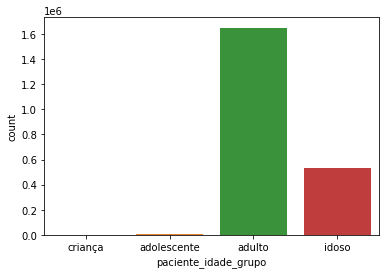

In [127]:
sns.countplot(x="paciente_idade_grupo",data=data_selected_final)

In [192]:
data_selected_final.to_csv('microdados_selected.csv',index=False)

In [209]:
selected_ = data_microdados[data_microdados['paciente_idade'] < 18][['paciente_idade','vacina_grupoAtendimento_nome','paciente_id']]

In [213]:
selected_ = selected_.groupby(by=['paciente_idade','vacina_grupoAtendimento_nome']).count()

In [215]:
selected_.to_csv("temp.csv")